In [2]:
from pathlib import Path
import sys

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler

from scipy.signal import butter, filtfilt

%matplotlib inline

In [3]:
# List the recordings in folder
# each recording folder must be named with the first word as the label, followed by an underscore: 
# e.g. `punch_xxx` and in this folder, the csv file corresponding. 
def get_data(base_dir, files):
    # read the data
    recordings = {}

    files = Path('.').joinpath(base_dir).glob(files)

    for f in sorted(files):

        data_info = str(f).split('/')[-1].split('_')
        label = data_info[0]
        placement = data_info[-2]
        val_type  = data_info[-1].split('.')[0]

        if(val_type == 'acc' and placement == 'arm'):
            this_gesture = pd.read_csv(f, header=0, names=['Phone timestamp','sensor timestamp [ns]','X [mg]','Y [mg]','Z [mg]'], index_col=0, sep=';', parse_dates=True)
            this_gesture = this_gesture.drop('sensor timestamp [ns]',axis=1)
            this_gesture = this_gesture.rename(columns={'X [mg]': 'X_arm', 'Y [mg]': 'Y_arm', 'Z [mg]': 'Z_arm'})
            this_gesture = this_gesture.resample('100ms').mean()

            if label in recordings.keys():             # if the label already exists in the dictionary
                recordings[label].append(this_gesture) # append the new gesture to the list
            else:
                recordings[label] = [this_gesture]     # otherwise, create a list with one element

        elif(val_type == 'acc' and placement == 'feet'):

            this_gesture = pd.read_csv(f, header=0, names=['Phone timestamp','sensor timestamp [ns]','X [mg]','Y [mg]','Z [mg]'], index_col=0, sep=';', parse_dates=True)
            this_gesture = this_gesture.rename(columns={'X [mg]': 'X_feet', 'Y [mg]': 'Y_feet', 'Z [mg]': 'Z_feet'})
            this_gesture = this_gesture.drop('sensor timestamp [ns]',axis=1)
            this_gesture = this_gesture.resample('100ms').mean()

            recordings[label][-1] = recordings[label][-1].join(this_gesture, how='inner', lsuffix='left', rsuffix='right')



    labels = recordings.keys()
    print(f'{len(labels)} labels found ({labels}).')

    return recordings


In [4]:
recordings = get_data('Data','**/*.txt')

4 labels found (dict_keys(['Dead', 'Ohp', 'Pullup', 'Squat'])).


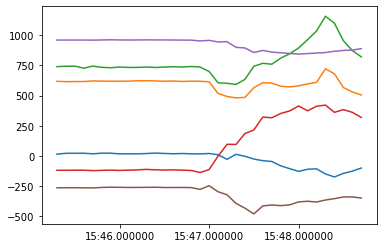

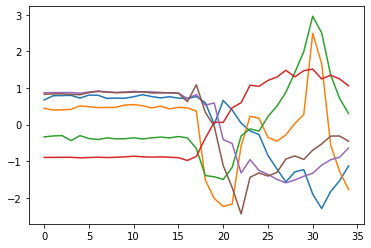

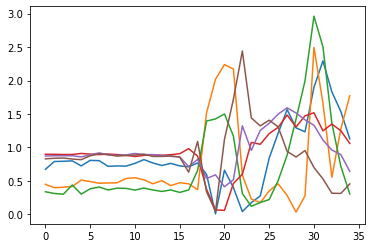

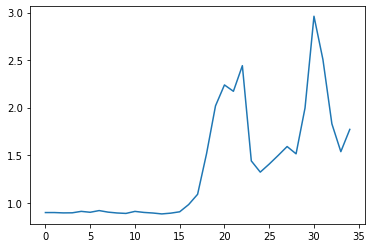

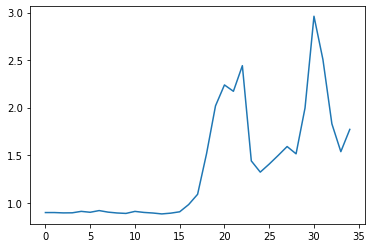

In [5]:
test_record = recordings['Squat'][0]

plt.plot(test_record)
plt.show()

scaler = StandardScaler()
test_record_show = scaler.fit_transform(test_record)
plt.plot(test_record_show)
plt.show()

scaler = StandardScaler()
test_record_show = scaler.fit_transform(test_record)
test_record_show = np.absolute(test_record_show)
plt.plot(test_record_show)
plt.show()

scaler = StandardScaler()
test_record_show = scaler.fit_transform(test_record)
test_record_show = np.absolute(test_record_show)
test_record_show = np.max(test_record_show,axis=1)
plt.plot(test_record_show)
plt.show()

scaler = StandardScaler()
test_record_show = scaler.fit_transform(test_record)
test_record_show = np.absolute(test_record_show)
test_record_show = np.max(test_record_show,axis=1)


plt.plot(test_record_show)
plt.show()

In [6]:
def isol_min(data, threshold):
    scaler = StandardScaler()
    data = scaler.fit_transform(data)
    data = np.absolute(data)
    data = np.max(data,axis=1)
    return data > 1.

(35, 6)
(35,)


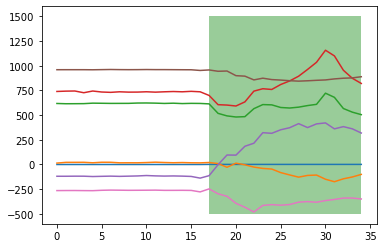

In [7]:
isol = isol_min(test_record,0.0)
print(test_record.shape)
print(isol.shape)
index = np.arange(0,isol.shape[0])
plt.plot(index,isol)
plt.fill_between(index, -500,1500, where=isol==True, facecolor='green', alpha=0.4, label='upstairs')
plt.plot(index,test_record)


(29, 6)
(29,)


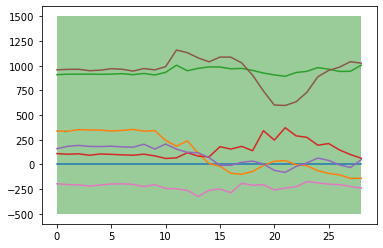

In [8]:
test_record = recordings['Pullup'][0]

isol = isol_min(test_record,0.0)
print(test_record.shape)
print(isol.shape)
index = np.arange(0,isol.shape[0])
plt.plot(index,isol)
plt.fill_between(index, -500,1500, where=isol==True, facecolor='green', alpha=0.4, label='upstairs')
plt.plot(index,test_record)

In [9]:
#-----------------------------------------------------------------------------------------------
# FFT
#-----------------------------------------------------------------------------------------------

In [10]:
sampling_rate = 10
sample_spacing = 0.1

In [11]:
recordings = get_data('Data_old','**/*.txt')

5 labels found (dict_keys(['benchAlt', 'dead', 'ohp', 'squat', 'traction'])).


(221,)


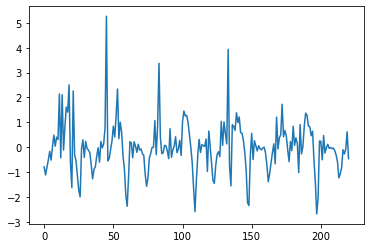

In [31]:
from numpy import linalg as LA
test_serie = recordings['dead'][0]
test_serie_plot = test_serie
scaler = StandardScaler()

test_serie = LA.norm(test_serie,  axis=1)
test_serie = np.array(test_serie)
#test_serie = test_serie[:,2]
test_serie = test_serie.reshape(-1, 1)
test_serie = scaler.fit_transform(test_serie)
test_serie = test_serie.flatten()
print(test_serie.shape)
plt.plot(test_serie)


[ 0.          0.04524887  0.09049774  0.13574661  0.18099548  0.22624434
  0.27149321  0.31674208  0.36199095  0.40723982  0.45248869  0.49773756
  0.54298643  0.58823529  0.63348416  0.67873303  0.7239819   0.76923077
  0.81447964  0.85972851  0.90497738  0.95022624  0.99547511  1.04072398
  1.08597285  1.13122172  1.17647059  1.22171946  1.26696833  1.31221719
  1.35746606  1.40271493  1.4479638   1.49321267  1.53846154  1.58371041
  1.62895928  1.67420814  1.71945701  1.76470588  1.80995475  1.85520362
  1.90045249  1.94570136  1.99095023  2.0361991   2.08144796  2.12669683
  2.1719457   2.21719457  2.26244344  2.30769231  2.35294118  2.39819005
  2.44343891  2.48868778  2.53393665  2.57918552  2.62443439  2.66968326
  2.71493213  2.760181    2.80542986  2.85067873  2.8959276   2.94117647
  2.98642534  3.03167421  3.07692308  3.12217195  3.16742081  3.21266968
  3.25791855  3.30316742  3.34841629  3.39366516  3.43891403  3.4841629
  3.52941176  3.57466063  3.6199095   3.66515837  3.

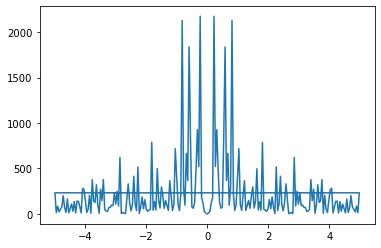

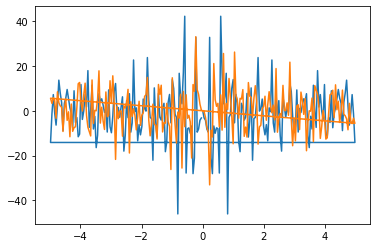

0.22624434389140272


In [13]:
sp = np.fft.fft(test_serie)
freq = np.fft.fftfreq(test_serie.shape[0], sample_spacing)
print(freq)

print(test_serie.shape[0])
print(np.argmax(np.abs(sp)))

active_freq = np.abs(sp.real**2 + sp.imag**2)
print(active_freq)

plt.plot(freq, active_freq)
plt.show()
plt.plot(freq, sp.real, freq, sp.imag)
plt.show()

max_index = np.argmax(active_freq)
max_freq = freq[max_index]
print(max_freq)

44.2


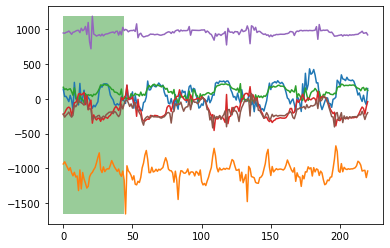

In [14]:
period = 1 / max_freq * sampling_rate
print(period)

index = np.arange(0,test_serie_plot.shape[0])
thresh = index < period

min_val = np.min(np.array(test_serie_plot).flatten())
max_val = np.max(np.array(test_serie_plot).flatten())

plt.fill_between(index, min_val, max_val, where=thresh==True, facecolor='green', alpha=0.4, label='upstairs')
plt.plot(index,test_serie_plot)

In [15]:
#-----------------------------------------------------------------------------------------------
# Serie isolation
#-----------------------------------------------------------------------------------------------

In [181]:
serie_record = get_data('Data_serie_test','**/*.txt')
print(serie_record)
serie_record = serie_record['Test'][0]


1 labels found (dict_keys(['Test'])).
{'Test': [                          X_arm   Y_arm   Z_arm  X_feet  Y_feet  Z_feet
Phone timestamp                                                        
2021-12-29 11:02:38.600  976.75 -123.25  151.75    -3.8   990.8   -80.6
2021-12-29 11:02:38.700  929.60 -134.20  155.00   -13.0   981.4  -134.6
2021-12-29 11:02:38.800  973.80 -230.00  129.80   126.6   989.0  -255.0
2021-12-29 11:02:38.900  955.00 -262.00  128.80    80.6   873.0  -418.6
2021-12-29 11:02:39.000  943.60 -257.40  106.20  -528.2   922.8   -97.8
...                         ...     ...     ...     ...     ...     ...
2021-12-29 11:06:22.600  950.40 -178.20  234.20    76.8   974.4  -148.4
2021-12-29 11:06:22.700  947.00 -174.40  234.80    93.4   974.8  -119.2
2021-12-29 11:06:22.800  946.00 -177.80  240.40   117.8   976.8  -120.0
2021-12-29 11:06:22.900  948.20 -183.80  224.60   107.6   976.6  -108.4
2021-12-29 11:06:23.000  947.00 -189.00  218.00   117.2   977.0  -112.0

[2245 rows x 6 

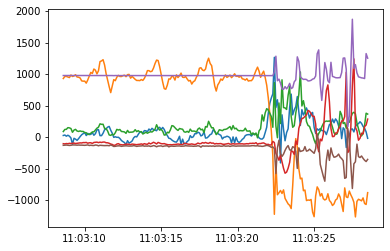

In [458]:
plt.plot(serie_record[300:500])


In [515]:
def best_variance(data):
    variance = np.var(data, axis=0)
    return data[:,np.argmax(variance)]

In [519]:
def prepare_data(data, scaler):
    data_prepared = best_variance(data)
    #data_prepared = LA.norm(data,  axis=1)
    data_prepared = data_prepared.reshape(-1, 1)
    data_prepared = scaler.fit_transform(data_prepared)
    data_prepared = data_prepared.flatten()
    return data_prepared

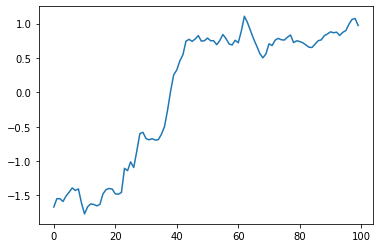

In [535]:
scaler = StandardScaler()

a = np.array(serie_record)

serie_record_shaped = prepare_data(a[100:200],scaler)

plt.plot(serie_record_shaped)

2
0.30000000000000004


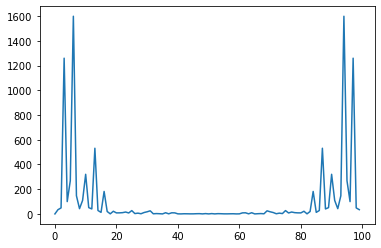

In [534]:
sp = np.fft.fft(serie_record_shaped)
active_freq = np.abs(sp.real**2 + sp.imag**2)
freq = np.fft.fftfreq(serie_record_shaped.shape[0], sample_spacing)
max_index = np.argmax(active_freq[1:5])
print(max_index)
max_freq = freq[1+max_index]
print(max_freq)
plt.plot(active_freq)

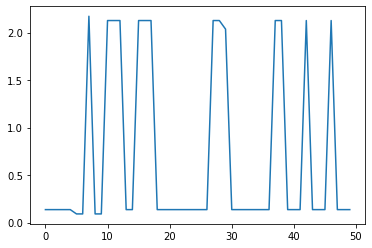

In [90]:
i = 0
window = 50
max_freq_over_time = []

while i + window < serie_record_shaped.size:
    
    sp = np.fft.fft(serie_record_shaped[i:window+i])
    i += 1
    active_freq = np.abs(sp.real**2 + sp.imag**2)
    max_index = np.argmax(active_freq)
    max_freq = freq[max_index]

    max_freq_over_time.append(max_freq)
    
plt.plot(max_freq_over_time)

In [522]:
# we need at least 50 sample to get the low frequency representing our serie

def scan_ftt(data, padding=1, window=100, threshold=400,freq_by_rep=[[0,5]]):
    
    scaler = StandardScaler() # create the scaler to prepare the data
    result = np.zeros(data.shape[0]) # create an array of result
    
    i = 0
    
    freq = np.fft.fftfreq(window, sample_spacing) # get all the frequency that our fft can find
    
    # rolling on the dataset
    while i + window < data.shape[0]:
        
        # need to be done on the window and not the whole dataset
        split = data[i:window+i]
        split = prepare_data(split, scaler)
        
        # fft is done
        sp = np.fft.fft(split)
        # create a real value using the img and real of the fft
        active_freq = np.abs(sp.real**2 + sp.imag**2)
        # get the max response inpulse 

        for index, range_freq in enumerate(freq_by_rep):
            min_freq = range_freq[0]
            max_freq = range_freq[1]
        
            max_amplitude = np.max(active_freq[min_freq:max_freq])
            # get the max frequency that give the max response inpulse
            max_index = np.argmax(active_freq[min_freq:max_freq])
            max_freq = freq[min_freq+max_index]
            
            # get the period
            #period = int(1 / max_freq * sampling_rate)

            if max_amplitude > threshold:
                result[i:window+i] = index + 1
    
        i+= padding
        
    return result

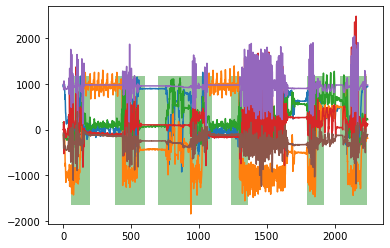

In [527]:

serie_record_np = np.array(serie_record)

freq_by_rep=[[0,5],[10,20]]

result = scan_ftt(serie_record_np, window=100, threshold=3000, padding=20, freq_by_rep=freq_by_rep)

index = np.arange(0,serie_record.shape[0])

plt.fill_between(index, min_val, max_val, where=result==1, facecolor='green', alpha=0.4, label='upstairs')
plt.fill_between(index, min_val, max_val, where=result==2, facecolor='red', alpha=0.4, label='upstairs')
plt.plot(index,serie_record)

[False False False ...  True  True  True]


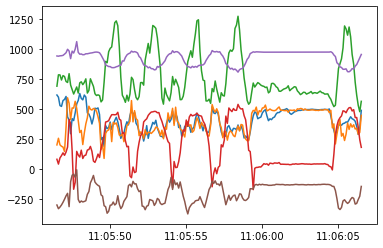

In [489]:
print(result==0)
splits = []
for x in np.split(serie_record, np.where(result!=1)[0]):
    if x.shape[0] > 1:
        splits.append(x)
plt.plot(splits[2])


In [ ]:
#-----------------------------------------------------------------------------------------------------------------
# LOW PASS FILTER
#-----------------------------------------------------------------------------------------------------------------

2245
[-3.19179246e-06 -7.04993863e-06 -3.80080975e-06 ... -5.28030605e-01
 -4.42359847e-01 -3.49166104e-01]


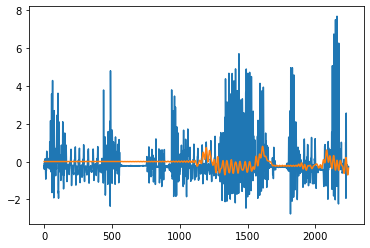

In [212]:
import scipy

scaler = StandardScaler()

serie_record_shaped = prepare_data(serie_record,scaler)

plt.plot(serie_record_shaped)

print(serie_record_shaped.size)

N = serie_record_shaped.size
Fc = 0.5
Fs = 10
# provide them to firwin
h = scipy.signal.firwin(numtaps=N, cutoff=Fc, nyq=Fs/2)
# 'x' is the time-series data you are filtering
y = scipy.signal.lfilter(h, 1.0, serie_record_shaped)
print(y)
plt.plot(y)

In [241]:
# we need at least 50 sample to get the low frequency representing our serie

def scan_fir(data, padding=100, window=100, threshold=1000, nb_second=5):
    
    scaler = StandardScaler() # create the scaler to prepare the data
    result = np.zeros(data.shape[0]) # create an array of result
    
    i = 0
    
    
    # rolling on the dataset
    while i + window < data.shape[0]:
        
        # need to be done on the window and not the whole dataset
        split = data[i:window+i]
        split = prepare_data(split, scaler)
        
        N = split.size
        Fc = 0.5
        Fs = 10
        # provide them to firwin
        h = scipy.signal.firwin(numtaps=N, cutoff=Fc, nyq=Fs/2)
        # 'x' is the time-series data you are filtering
        y = scipy.signal.lfilter(h, 1.0, split)
        result[i:window+i] = y
        
        i+= padding
        
    return result

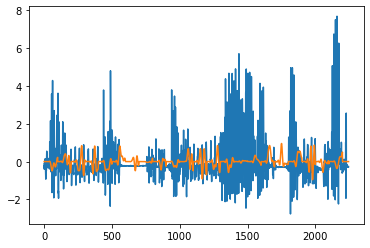

In [242]:
plt.plot(serie_record_shaped)

y = scan_fir(serie_record)

plt.plot(y)

In [ ]:
#-----------------------------------------------------------------------------------------------------------------
# findminima
#-----------------------------------------------------------------------------------------------------------------

In [548]:
def prepare_data2(data, scaler):
    data_prepared = LA.norm(data,  axis=1)
    #data_prepared = data_prepared.reshape(-1, 1)
    #data_prepared = scaler.fit_transform(data_prepared)
   # data_prepared = data_prepared.flatten()
    return data_prepared

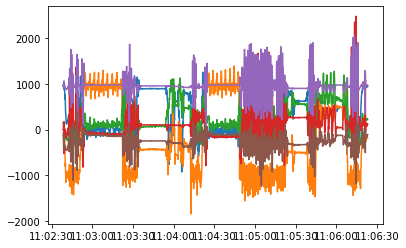

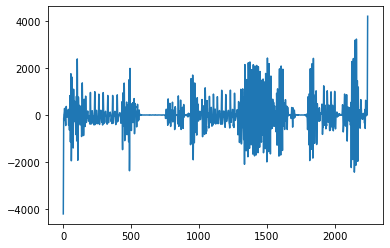

In [558]:
plt.plot(serie_record)
plt.show()

a = np.array(serie_record)

#variance = np.var(serie_record, axis=0)
#print(np.argmax(variance))
a = prepare_data2(a,scaler)
a = np.convolve(a,[-1,-1,-1,0,1,1,1], 'same')

plt.plot(a)
